In [1]:
import sys
sys.path.append('../../') # or just install the module
sys.path.append('../../../flaming-choripan') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '/home/opimentel/tesis/astro-lightcurves-handler/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 5.138[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (/home/opimentel/tesis/astro-lightcurves-handler/save)
(0) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.270[mbs]
(1) - /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd - 5.138[mbs]
─────────────────────────────────────────────────────────────────────

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
filedir = '/home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: /home/opimentel/tesis/astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset:
[raw - samples 2,047]
(*) obs_samples: 65,174 - min_len: 6 - max_dur: 538.8[days] - p50_dur: 52.9[days]
(g) obs_samples: 28,351 - min_len: 0 - max_dur: 538.8[days] - p50_dur: 38.9[days] - p50_cadence: 3.0[days]
(r) obs_samples: 36,823 - min_len: 0 - max_dur: 538.8[days] - p50_dur: 50.9[days] - p50_cadence: 3.0[days]
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | allSNII - 377/2,047 (18.42%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw_train - samples 1,636]
(*) obs_samples: 51,971 - min

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
14.069985472419527
15.244618491303966


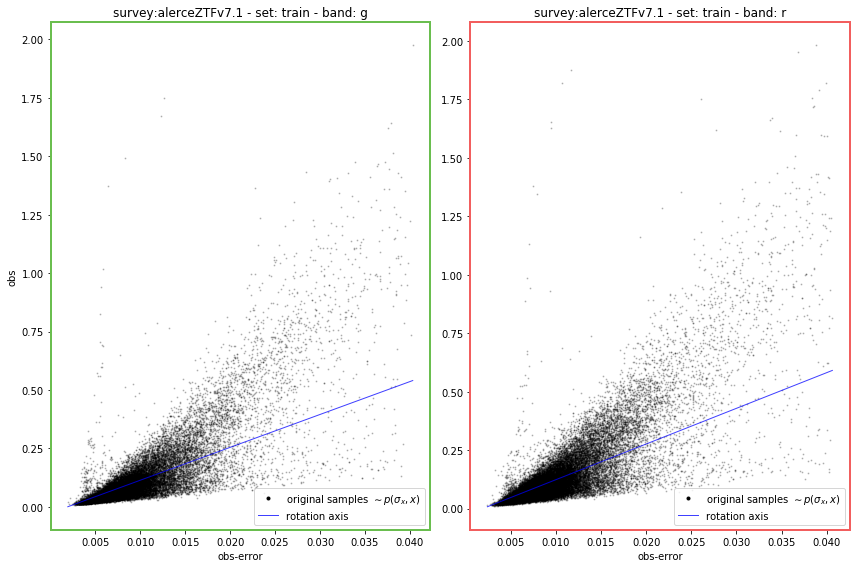

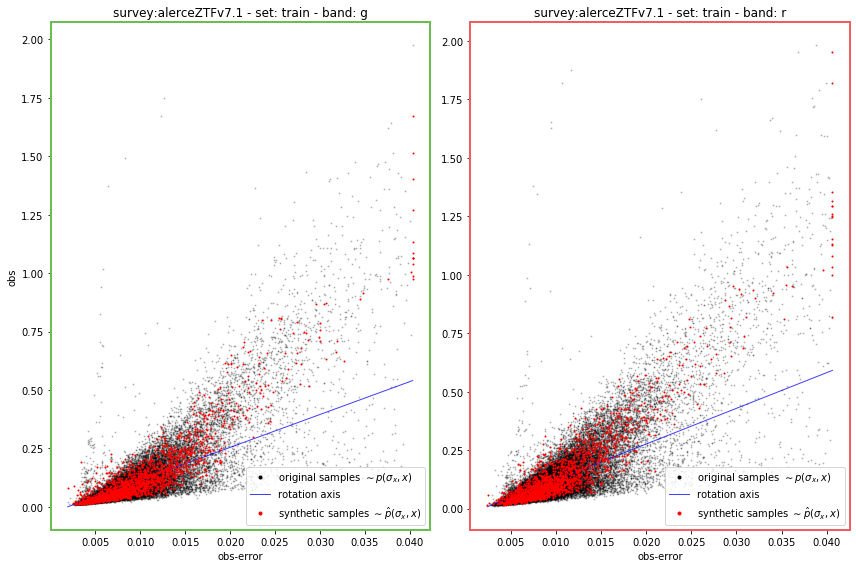

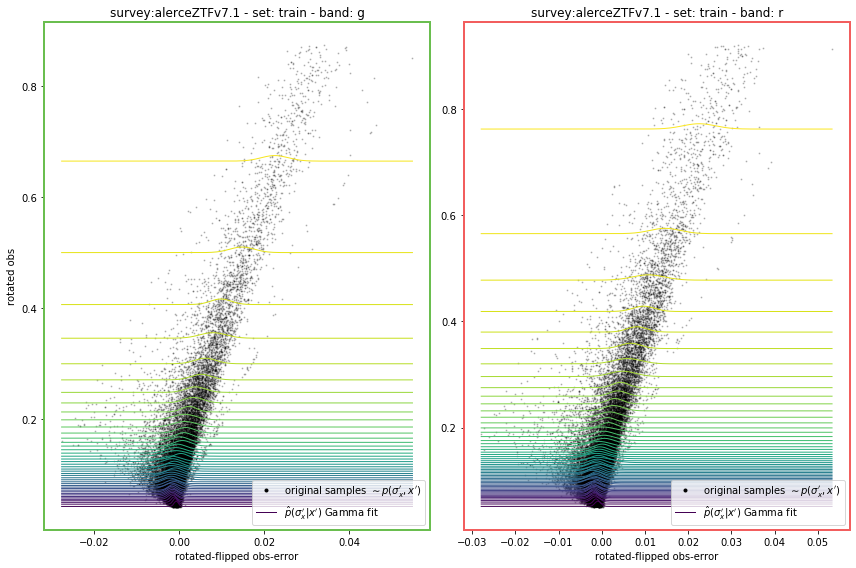

In [57]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
from lchandler.plots.plots import plot_length_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
offset = 5
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b, offset) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import GEN_CDICT
from lchandler.plots.lc import plot_synthetic_samples

method = 'curve_fit'
method = 'mcmc'
set_name = 'train'
new_bounds = 1
save_rootdir = '/home/opimentel/tesis/astro-lightcurves-handler/save'
save_rootdir = None
synthetic_samples_per_curve = 32

lcset = lcdataset[set_name]
ignored_names = [
    'ZTF20aacbwbm',
]
risky_names = [
    'ZTF19aaserwb',
    'ZTF18abcrzfz',
    'ZTF18aayjyub',
    'ZTF18adaslwa',
    'ZTF18adbyxua',
    'ZTF19aahsnmq',
]
for lcobj_name in ignored_names+risky_names:
    #lcobj_name = lc_set.get_random_lcobj_name() # random
    lcobj = lcset[lcobj_name]
    band_names = lcset.band_names
    class_names = lcset.class_names
    sne_generator = GEN_CDICT[method](lcobj, class_names, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
    new_lcobjs, new_lcobjs_pm, fit_errors_bdict = sne_generator.sample_curves(synthetic_samples_per_curve)
    plot_kwargs = {
        'fit_errors_bdict':fit_errors_bdict,
        'save_rootdir':save_rootdir,
    }
    plot_synthetic_samples(lcdataset, set_name, method, lcobj_name, new_lcobjs, new_lcobjs_pm, **plot_kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_mcmc_trace

plot_mcmc_trace(sne_generator.mcmc_trace_bdict, 'g')

# generate synth data

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generators import generate_synthetic_dataset

sd_kwargs = {
    'synthetic_samples_per_curve':128,
    #'method':'curve_fit',
    'method':'mcmc',
    'ignored_lcobj_names':[
        'ZTF18aajkivu',
    ],
    'save_rootdir':'/home/opimentel/tesis/astro-lightcurves-handler/save',
}
errors = generate_synthetic_dataset(lcdataset, 'train', obse_sampler_bdict, length_sampler_bdict, **sd_kwargs)
print(lcdataset)

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)